## Importing Libraries

In [121]:
import re                                                              
import os                                                              
import numpy as np
import pandas as pd
import json
import glob

%matplotlib inline
import matplotlib.pyplot as plt                                        
import matplotlib.animation as animation
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm                                                 
tqdm.pandas()
import scipy.stats as stats

import gensim
from gensim import models
from gensim import corpora
from gensim.utils import simple_preprocess
from collections import defaultdict
from gensim.models import CoherenceModel

import nltk
from nltk.stem import SnowballStemmer   
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
#nltk.download('omw-1.4')
#nltk.download('wordnet')
#nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import pyLDAvis.gensim_models as gensimvis

import spacy
from spacy.lang.pt.examples import sentences 

from unidecode import unidecode

import string

from numpy import random 

import statsmodels.api as sm
import statsmodels.formula.api as smf

# pip install linearmodels
from linearmodels.panel.model import PanelOLS

## Loading Data

In [2]:
path = os.getcwd()

df = pd.read_csv(path + "/tweets_brasil_1.csv")

/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (29,30,32,40,42,43,44,50,68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
tweets = df[['id','text','created_at','author_id','author.name','author.description',
             'author.entities.description.hashtags','in_reply_to_username','quoted_username','geo.full_name',
             'geo.coordinates.coordinates','Brasilia','SaoPaulo','RiodeJaneiro','Fortaleza','Salvador']].copy()

In [4]:
tweets.head(10)

,id,text,created_at,author_id,author.name,author.description,author.entities.description.hashtags,in_reply_to_username,quoted_username,geo.full_name,geo.coordinates.coordinates,Brasilia,SaoPaulo,RiodeJaneiro,Fortaleza,Salvador
0,1614412011743461377,@TyraMain @GShinobiz SIM MANO! é minha kunoich...,2023-01-14T23:59:52.000Z,3342006537,hela,born to flop,NaN,TyraMain,NaN,"Brasilia, Brasil",NaN,1,0,0,0,0
1,1614411905023500289,@delucca Terrorista &amp; criminosa,2023-01-14T23:59:27.000Z,1435651588773883912,PeelLineBsB,Distribuidor OFICIAL PeelLine Brasília-DF\nDer...,NaN,delucca,NaN,"Brasilia, Brasil",NaN,1,0,0,0,0
2,1614411869120335873,@Marc31ox @dricacrf @C4RIM https://t.co/hBJAWf...,2023-01-14T23:59:18.000Z,210620557,Marcos Martinho,"Conflitos psicológicos atenuados, temática com...",NaN,Marc31ox,NaN,"Brasilia, Brasil",NaN,1,0,0,0,0
3,1614411742632898561,"Sábado quem vem já tem Anitta, tenho nem roupa...",2023-01-14T23:58:48.000Z,1175621317653082112,RooDrigo~⚡,"É que meu estilo é caro, sedutor e perigoso",NaN,NaN,NaN,"Brasilia, Brasil",NaN,1,0,0,0,0
4,1614411722005118976,Mentira https://t.co/svEjdEHCzU,2023-01-14T23:58:43.000Z,756533922855522304,𝔸𝕗𝕣𝕠𝕕𝕚𝕥𝕖,https://t.co/mMfrG36Pkk,NaN,NaN,choquei,"Brasilia, Brasil",NaN,1,0,0,0,0
5,1614411639465320461,hahahahahahhaha https://t.co/nRcAz2Lul4,2023-01-14T23:58:23.000Z,151696294,lucas sabino,designer e whovian de carteirinha.,NaN,NaN,oQuarterback,"Brasilia, Brasil",NaN,1,0,0,0,0
6,1614411626299494406,eu amo como minha família é sempre receptiva\n...,2023-01-14T23:58:20.000Z,555600264,Dani ✨,Juro que já tava assim quando cheguei,NaN,NaN,NaN,"Brasilia, Brasil",NaN,1,0,0,0,0
7,1614411605579554820,Mas todo mundo queria receber https://t.co/7g3...,2023-01-14T23:58:15.000Z,1112949432,ℌ𝔦𝔯𝔬𝔰𝔥𝔦𝔪𝔞ᶜʳᶠ,@amandeinudes 🖤// @Flamengo❤🖤,NaN,NaN,vanglockkk,"Brasilia, Brasil",NaN,1,0,0,0,0
8,1614411565578555393,@eduardobarao Mas essa família tradicional bra...,2023-01-14T23:58:06.000Z,254649333,Ana,NaN,NaN,eduardobarao,NaN,"Brasilia, Brasil",NaN,1,0,0,0,0
9,1614411390357504002,Quem n tem TAG nunca vai entender como é convi...,2023-01-14T23:57:24.000Z,1116937083677966338,ba,this is a fan account 🙃,NaN,NaN,NaN,"Brasilia, Brasil",NaN,1,0,0,0,0


## Descriptive Statistics

In [5]:
# Creating the column that has the datetime parameter 

tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets['year'], tweets['month'], tweets['day'] = pd.DatetimeIndex(tweets['created_at']).year, pd.DatetimeIndex(tweets['created_at']).month, pd.DatetimeIndex(tweets['created_at']).day

tweets['created_at'] = tweets['created_at'].dt.strftime("%d/%m/%Y")

In [6]:
tweets['city'] = tweets['geo.full_name'].str.split(',', expand = True,n=1)[0]

In [7]:
print(tweets.groupby('city')['text'].count())
volume_day = tweets.groupby(['created_at','city'])[['text']].count()
print(volume_day.groupby(['city']).mean())
print(tweets.groupby('city')['author_id'].nunique())
unique_day = tweets.groupby(['created_at','city'])[['author_id']].nunique()
print(unique_day.groupby(['city']).mean())

city
Brasilia           78526
Fortaleza          54133
Río de Janeiro    462595
Salvador           50801
Sao Paulo         242360
Name: text, dtype: int64
                        text
city                        
Brasilia         6040.461538
Fortaleza        4164.076923
Río de Janeiro  35584.230769
Salvador         3907.769231
Sao Paulo       18643.076923
city
Brasilia           5832
Fortaleza          3824
Río de Janeiro    31573
Salvador           3724
Sao Paulo         17901
Name: author_id, dtype: int64
                   author_id
city                        
Brasilia         1613.384615
Fortaleza        1117.000000
Río de Janeiro  10353.230769
Salvador         1012.000000
Sao Paulo        5037.230769


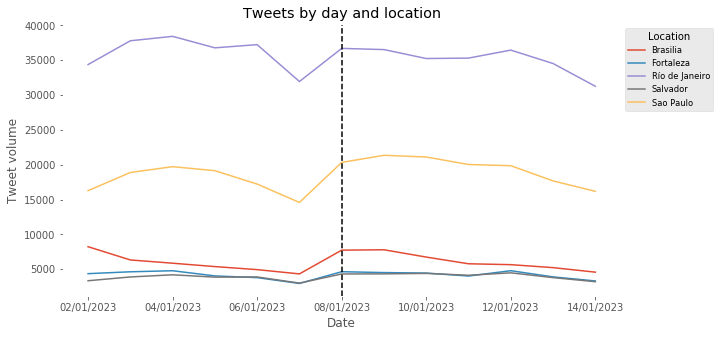

In [8]:
pivot_table = pd.pivot_table(volume_day, values='text', index='created_at', columns='city')

# plot the pivot table
ax = pivot_table.plot(figsize=(10, 5))

# set the title and axis labels
ax.set_title('Tweets by day and location')
ax.set_xlabel('Date')
ax.set_ylabel('Tweet volume')
ax.legend(title="Location", loc='best', fontsize='small', fancybox=True, bbox_to_anchor=(1, 1))
ax.set_facecolor('white')
plt.axvline(x = 6, color = 'black', linestyle = "--")

# display the plot
plt.show()

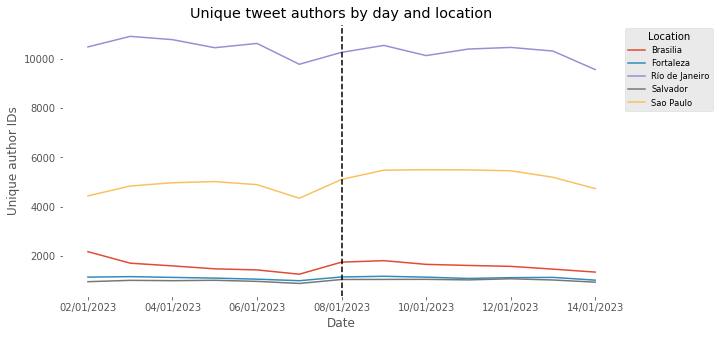

In [9]:
pivot_table = pd.pivot_table(unique_day, values='author_id', index='created_at', columns='city')

# plot the pivot table
ax = pivot_table.plot(figsize=(10, 5))

# set the title and axis labels
ax.set_title('Unique tweet authors by day and location')
ax.set_xlabel('Date')
ax.set_ylabel('Unique author IDs')
ax.legend(title="Location", loc='best', fontsize='small', fancybox=True, bbox_to_anchor=(1, 1))
ax.set_facecolor('white')
plt.axvline(x = 6, color = 'black', linestyle = "--")

# display the plot
plt.show()

## Data Pre-Processing

In [10]:
# Passing tweets as list

text_col = tweets['text'].to_list()

In [11]:
# Creating dictionary of Portuguese stopwords

sw_nltk = stopwords.words('portuguese')

new_stopwords = ['tipo', 'vei', 'mano', 'ei', 'to', 'dps', 'eh', 'tá', 'tão', 'tava', 'tavam', 'cê', 'mt', 'mto', 
                 'n', 'tbm', 'tb', 'qqlr', 'qualquer', 'gnt', 'gente', 'cara']

sw_nltk.extend(new_stopwords)

# removing accents from the stopwords
sw_nltk = [unidecode(item, errors="preserve") for item in sw_nltk]

In [12]:
# Creating the pre-processing function

def preprocess(text):
    tweets = []
    for tweet in text:
        text_lower = tweet.lower() # lowercase
        text_num = re.sub(r'\d+', '', text_lower) # remove numbers
        text_line = text_num.replace("\\n", " ") # transforming line break into whitespace
        text_double = re.sub(' +', ' ', text_line) # remove double spaces
        text_and = re.sub('amp', 'e', text_double) # replace & for e
        text_mention = re.sub('@[^\s]*', "", text_and) # remove @ and everything that comes after
        text_punct = re.sub('[%s]' % re.escape(string.punctuation), '' , text_mention) # remove punctuation
        text_acc = unidecode(text_punct, errors="preserve") # remove accents
        text_links = re.sub('http[^\s]*', "", text_acc)# remove links
        text_stop = " ".join([word for word in text_links.split() if word not in sw_nltk]) # remove stopwords
        tweets.append(text_stop)
    return tweets

<>:11: DeprecationWarning: invalid escape sequence \s
<>:14: DeprecationWarning: invalid escape sequence \s
<>:11: DeprecationWarning: invalid escape sequence \s
<>:14: DeprecationWarning: invalid escape sequence \s
<>:11: DeprecationWarning: invalid escape sequence \s
<>:14: DeprecationWarning: invalid escape sequence \s
<ipython-input-12-b4ca61b91189>:11: DeprecationWarning: invalid escape sequence \s
  text_mention = re.sub('@[^\s]*', "", text_and) # remove @ and everything that comes after
<ipython-input-12-b4ca61b91189>:14: DeprecationWarning: invalid escape sequence \s
  text_links = re.sub('http[^\s]*', "", text_acc)# remove links


In [13]:
# Pre-processing tweets

tweets_list = preprocess(text_col)

In [14]:
tweets['processed_tweets'] = tweets_list
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888416 entries, 0 to 888415
Data columns (total 21 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   id                                    888416 non-null  int64 
 1   text                                  888416 non-null  object
 2   created_at                            888416 non-null  object
 3   author_id                             888416 non-null  int64 
 4   author.name                           888219 non-null  object
 5   author.description                    792106 non-null  object
 6   author.entities.description.hashtags  36977 non-null   object
 7   in_reply_to_username                  314336 non-null  object
 8   quoted_username                       152694 non-null  object
 9   geo.full_name                         888415 non-null  object
 10  geo.coordinates.coordinates           17289 non-null   object
 11  Brasilia     

## LDA Model

In [15]:
# Creating a random subset in order to run the LDA

random.seed(10) ## fixing subsample seed

n_subset = 50000 ## size of the subsample
ind_subset = random.choice(df.shape[0], size= n_subset, replace=False) ## indices of sampled points

df2 = df.copy().iloc[ind_subset,] ## selecting the subsampled indicies

tweets_sub = df2[['id','text','created_at','author_id','author.name','author.description',
             'author.entities.description.hashtags','in_reply_to_username','quoted_username','geo.full_name',
             'geo.coordinates.coordinates','Brasilia','SaoPaulo','RiodeJaneiro','Fortaleza','Salvador']].copy()

text_col_sub = tweets_sub['text'].to_list()
tweets_list_sub = preprocess(text_col_sub)

In [16]:
# Defining the tokenizer function

def gen_words(texts):
   final = []
   for tweet in texts:
        new = word_tokenize(tweet, )
        final.append(new)
        
   return (final)

In [17]:
aug_tweets = gen_words(tweets_list_sub)

In [18]:
# Defining necessary functions

def create_eta(priors, etadict, ntopics):
    eta = np.full(shape=(ntopics, len(etadict)), fill_value=0.0001) # create a (ntopics, nterms) matrix and fill with low number
    for word, topic in priors.items(): # for each word in the list of priors
        keyindex = [index for index,term in etadict.items() if term==word] # look up the word in the dictionary
        if (len(keyindex)>0): # if it's in the dictionary
            eta[topic,keyindex[0]] = 500  # put a large number in there
    return eta

In [19]:
# Creating a dictionary of political words to pass as priors

political_dictionary = ['bolsonaro','lula','stf','ministro','xandao','congresso','planalto','bolsonarista','petista',
                        'lulista','esquerda','direita','conservador','senador','camara','conservador','senado',
                        'corrupto','esquerdista','corrupcao','ladrao','rachadinha','ministerio','comunismo',
                        'comunista','nazista','fascista','fascismo','genocida','governo','desgoverno','pais',
                        'brasil','patria','golpe','golpistas','fraude','urna','conservadora','mito','liberdade',
                        'intervencao','politica','militar','impresso','voto','eleicao','general']

nonpolitical_dictionary = ['bloco', 'tristeza', 'sociedade', 'molhar', 'esmalte', 'biblioteca', 'literatura', 
                           'espelho', 'pagar', 'guindaste', 'ator', 'circulo', 'mochila', 'dicas', 'vigor', 
                           'suicídio', 'grande', 'nostalgia', 'parente', 'machado', 'vergonha', 'casal', 'sogro',
                          'meninas','nervoso','sono','sobremesa','teoria','careca','semana','melhor','subir','filha',
                           'catedral','biquini','transportar','escrever','esporte','tempo','ponto','rasgar','artista',
                           'fim','ouvir','restaurante','bumbum','trem','casa']

In [20]:
# Redefining weights for political prior

prior_words = {'bolsonaro':2,'lula':2,'stf':2,'ministro':2,'xandao':2,'congresso':2,'planalto':2,'bolsonarista':2,'petista':2,
'lulista':2,'esquerda':2,'direita':2,'conservador':2,'senador':2,'camara':2,'conservador':2,'senado':2,
'corrupto':2,'esquerdista':2,'corrupcao':2,'ladrao':2,'rachadinha':2,'ministerio':2,'comunismo':2,
'comunista':2,'nazista':2,'fascista':2,'fascismo':2,'genocida':2,'governo':2,'desgoverno':2,'pais':2,
'brasil':2,'patria':2,'golpe':2,'golpistas':2,'fraude':2,'urna':2,'conservadora':2,'mito':2,'liberdade':2,
'intervencao':2,'politica':2,'militar':2,'impresso':2,'voto':2,'eleicao':2,'general':2}


In [21]:
id2word = corpora.Dictionary(aug_tweets)

# initiate the corpus
corpus = []
for text in aug_tweets:
    new = id2word.doc2bow(text)
    corpus.append(new)

In [22]:
eta = create_eta(prior_words, id2word, 10)

In [23]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=10,
                                      random_state=420,
                                      update_every=1,
                                      chunksize=100,
                                      passes=10,
                                      eta=eta,
                                      alpha="auto")

/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldamodel.py:849: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


In [26]:
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda, corpus, id2word, mds="mmds", R=30)
vis

/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.016818  0.077493       1        1  14.450927
2      0.050798 -0.431553       2        1  14.269494
7     -0.375739 -0.140190       3        1  12.249081
9     -0.239574  0.402293       4        1  11.209833
0      0.353101 -0.335133       5        1   9.461543
6      0.416463 -0.043896       6        1   8.964513
3      0.100119  0.466251       7        1   8.497499
8     -0.262361 -0.409392       8        1   7.919634
1     -0.461719  0.142667       9        1   7.116562
4      0.402094  0.271461      10        1   5.860914, topic_info=            Term          Freq         Total Category  logprob  loglift
169          pra  18494.000000  18494.000000  Default  30.0000  30.0000
11             q   8877.000000   8877.000000  Default  29.0000  29.0000
85           dia   8907.000000   8907.000000  Default  28.0000  28.0000
87           vai   8077.000000   8077.000000  Default  27.0000  27.0000
62            ai   5243.000000   5243.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
3    aquecimento      0.000403      0.003988  Topic10 -17.6643   0.5441
4          borro      0.000403      0.003988  Topic10 -17.6643   0.5441
5           coca      0.000403      0.003988  Topic10 -17.6643   0.5441
14     delegacia      0.000403      0.003988  Topic10 -17.6643   0.5441
6           hoje      0.000403   4526.382210  Topic10 -17.6643 -13.3980

[356 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
334      10  1.000018        ''
122       2  1.000102       ...
335      10  1.000141        ``
141       8  1.000104    acabou
511       8  0.999757  academia
...     ...       ...       ...
395       9  1.000008         🤣
92        9  0.997329      🤣🤣🤣🤣
467       1  1.000397         🥰
364       5  0.998871        🥰🥰
373       1  1.000327         🥲

[231 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 8, 10, 1, 7, 4, 9, 2, 5])

In [27]:
lda.show_topics(num_topics=10)

[(0,
  '0.146*"pq" + 0.122*"assim" + 0.107*"casa" + 0.097*"ver" + 0.087*"queria" + 0.057*"mae" + 0.056*"bbb" + 0.052*"sabe" + 0.042*"conta" + 0.035*"pai"'),
 (1,
  '0.173*"ter" + 0.150*"la" + 0.096*"boa" + 0.073*"desse" + 0.060*"video" + 0.056*"parabens" + 0.048*"🤣" + 0.042*"primeira" + 0.034*"apenas" + 0.031*"the"'),
 (2,
  '0.043*"..." + 0.032*"brasil" + 0.030*"lula" + 0.026*"bolsonaro" + 0.023*"governo" + 0.022*"pais" + 0.021*"vida" + 0.020*"esquerda" + 0.019*"golpistas" + 0.019*"direita"'),
 (3,
  '0.183*"agora" + 0.165*"deus" + 0.095*"ne" + 0.078*"anos" + 0.077*"dar" + 0.073*"amo" + 0.066*"fazendo" + 0.061*"kkk" + 0.033*"viu" + 0.033*"familia"'),
 (4,
  '0.134*"``" + 0.119*"pro" + 0.115*"\'\'" + 0.097*"alguem" + 0.070*"fez" + 0.060*"logo" + 0.056*"dormir" + 0.048*"falando" + 0.045*"tomar" + 0.044*"filho"'),
 (5,
  '0.173*"vai" + 0.128*"tudo" + 0.113*"ainda" + 0.061*"todo" + 0.055*"mim" + 0.049*"coisa" + 0.047*"amor" + 0.036*"mundo" + 0.036*"kkkkkkk" + 0.031*"certeza"'),
 (6,
  '0.

In [28]:
data_dict = {'dominant_topic':[], 'perc_contribution':[], 'topic_keywords':[]}

for i, row in enumerate(lda[corpus]):
    #print(i)
    row = sorted(row, key=lambda x: x[1], reverse=True)
    #print(row)
    for j, (topic_num, prop_topic) in enumerate(row):
        wp = lda.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        data_dict['dominant_topic'].append(int(topic_num))
        data_dict['perc_contribution'].append(round(prop_topic, 3))
        data_dict['topic_keywords'].append(topic_keywords)
        #print(topic_keywords)
        break

df_topics = pd.DataFrame(data_dict)

contents = pd.Series(aug_tweets)

df_topics.head(25)

,dominant_topic,perc_contribution,topic_keywords
0,5,0.145,"vai, tudo, ainda, todo, mim, coisa, amor, mund..."
1,8,0.347,"q, foto, acabou, publicar, paulo, brazil, ness..."
2,1,0.292,"ter, la, boa, desse, video, parabens, 🤣, prime..."
3,7,0.276,"dia, bom, vou, hoje, aqui, kkkk, pior, dias, l..."
4,9,0.196,"pra, sim, ir, tanto, porra, onde, foda, dessa,..."
5,8,0.350,"q, foto, acabou, publicar, paulo, brazil, ness..."
6,1,0.158,"ter, la, boa, desse, video, parabens, 🤣, prime..."
7,5,0.226,"vai, tudo, ainda, todo, mim, coisa, amor, mund..."
8,5,0.145,"vai, tudo, ainda, todo, mim, coisa, amor, mund..."
9,1,0.158,"ter, la, boa, desse, video, parabens, 🤣, prime..."


In [29]:
tweets = tweets.reset_index()
df_cl = pd.concat([tweets, df_topics], axis=1)
del df_cl['index']
df_cl['tweet.politico']=df_cl['dominant_topic'].apply(lambda x: 1 if (x==2) else 0)
df_cl.head(10)

,id,text,created_at,author_id,author.name,author.description,author.entities.description.hashtags,in_reply_to_username,quoted_username,geo.full_name,...,Salvador,year,month,day,city,processed_tweets,dominant_topic,perc_contribution,topic_keywords,tweet.politico
0,1614412011743461377,@TyraMain @GShinobiz SIM MANO! é minha kunoich...,14/01/2023,3342006537,hela,born to flop,NaN,TyraMain,NaN,"Brasilia, Brasil",...,0,2023,1,14,Brasilia,sim kunoichi fav hora dar espaco pra outros ta...,5.0,0.145,"vai, tudo, ainda, todo, mim, coisa, amor, mund...",0
1,1614411905023500289,@delucca Terrorista &amp; criminosa,14/01/2023,1435651588773883912,PeelLineBsB,Distribuidor OFICIAL PeelLine Brasília-DF\nDer...,NaN,delucca,NaN,"Brasilia, Brasil",...,0,2023,1,14,Brasilia,terrorista criminosa,8.0,0.347,"q, foto, acabou, publicar, paulo, brazil, ness...",0
2,1614411869120335873,@Marc31ox @dricacrf @C4RIM https://t.co/hBJAWf...,14/01/2023,210620557,Marcos Martinho,"Conflitos psicológicos atenuados, temática com...",NaN,Marc31ox,NaN,"Brasilia, Brasil",...,0,2023,1,14,Brasilia,,1.0,0.292,"ter, la, boa, desse, video, parabens, 🤣, prime...",0
3,1614411742632898561,"Sábado quem vem já tem Anitta, tenho nem roupa...",14/01/2023,1175621317653082112,RooDrigo~⚡,"É que meu estilo é caro, sedutor e perigoso",NaN,NaN,NaN,"Brasilia, Brasil",...,0,2023,1,14,Brasilia,sabado vem anitta roupa ainda,7.0,0.276,"dia, bom, vou, hoje, aqui, kkkk, pior, dias, l...",0
4,1614411722005118976,Mentira https://t.co/svEjdEHCzU,14/01/2023,756533922855522304,𝔸𝕗𝕣𝕠𝕕𝕚𝕥𝕖,https://t.co/mMfrG36Pkk,NaN,NaN,choquei,"Brasilia, Brasil",...,0,2023,1,14,Brasilia,mentira,9.0,0.196,"pra, sim, ir, tanto, porra, onde, foda, dessa,...",0
5,1614411639465320461,hahahahahahhaha https://t.co/nRcAz2Lul4,14/01/2023,151696294,lucas sabino,designer e whovian de carteirinha.,NaN,NaN,oQuarterback,"Brasilia, Brasil",...,0,2023,1,14,Brasilia,hahahahahahhaha,8.0,0.350,"q, foto, acabou, publicar, paulo, brazil, ness...",0
6,1614411626299494406,eu amo como minha família é sempre receptiva\n...,14/01/2023,555600264,Dani ✨,Juro que já tava assim quando cheguei,NaN,NaN,NaN,"Brasilia, Brasil",...,0,2023,1,14,Brasilia,amo familia sempre receptiva uber veio deixar ...,1.0,0.158,"ter, la, boa, desse, video, parabens, 🤣, prime...",0
7,1614411605579554820,Mas todo mundo queria receber https://t.co/7g3...,14/01/2023,1112949432,ℌ𝔦𝔯𝔬𝔰𝔥𝔦𝔪𝔞ᶜʳᶠ,@amandeinudes 🖤// @Flamengo❤🖤,NaN,NaN,vanglockkk,"Brasilia, Brasil",...,0,2023,1,14,Brasilia,todo mundo queria receber,5.0,0.226,"vai, tudo, ainda, todo, mim, coisa, amor, mund...",0
8,1614411565578555393,@eduardobarao Mas essa família tradicional bra...,14/01/2023,254649333,Ana,NaN,NaN,eduardobarao,NaN,"Brasilia, Brasil",...,0,2023,1,14,Brasilia,familia tradicional brasileira soberba violent...,5.0,0.145,"vai, tudo, ainda, todo, mim, coisa, amor, mund...",0
9,1614411390357504002,Quem n tem TAG nunca vai entender como é convi...,14/01/2023,1116937083677966338,ba,this is a fan account 🙃,NaN,NaN,NaN,"Brasilia, Brasil",...,0,2023,1,14,Brasilia,tag nunca vai entender conviver kkkkkk,1.0,0.158,"ter, la, boa, desse, video, parabens, 🤣, prime...",0


In [225]:
df_cl['tweet.politico'].sum()

5749

In [30]:
# Creating a dictionary of positive and negative words to pass as priors

positive_dictionary = ['feliz','felicidade','orgulho','otimo','otima','incrivel','amor','respeito','beleza','lindo',
                       'linda','amo','adoro','sensacional','hahaha','kkkkk','honesto','honesta',':)',
                       'sinceridade','competente','qualificado','maravilhosa','maravilhoso','bom','boa','😀','😃','😄',
                       '😁','😆','😅','😂','🤣','🥲','🥹','☺️','😊','😇','🙂','😉','😌','😍','🥰','😘','😗','😙','😚','😋',
                       '😛','😝','😜','🤩','🥳','🤗','😺','😸','😹','😻','😽']

negative_dictionary = ['bosta','merda','cu','corrupto','corrupta','ladrao','ladra','odio','triste','decepcionado',
                       'decepcionada','covarde','frouxo','frouxa','prisao','canalha','vagabundo','pqp','acredito',
                       'puto','puta','bizarro','surreal','idiota','vergonha','bandido','miliciano','🤬','😤','😠','😡',
                       '😒','😞','😔','😟','😕','🙁','☹️','😣','😖','😫','😩','😢','😭','😱','😨','😰','😥','😓','😐','😑',
                       '😪','🤢','🤮','🤧','🤒','🤕','👿','💩','🙀','😿','😾']


In [31]:
dictionary_pos_neg = {'bosta':3,'merda':3,'cu':3,'corrupto':3,'corrupta':3,'ladrao':3,'ladra':3,
                       'odio':3,'triste':3,'decepcionado':3,'decepcionada':3,'covarde':3,'frouxo':3,'frouxa':3,'prisao':3,
                       'canalha':3,'vagabundo':3,'pqp':3,'acredito':3,'puto':3,'puta':3,'bizarro':3,'surreal':3,'idiota':3,
                       'vergonha':3,'bandido':3,'miliciano':3,'🤬':3,'😤':3,'😠':3,'😡':3,'😒':3,'😞':3,'😔':3,'😟':3,'😕':3,
                       '🙁':3,'☹':3,'😣':3,'😖':3,'😫':3,'😩':3,'😢':3,'😭':3,'😱':3,'😨':3,'😰':3,'😥':3,'😓':3,'😐':3,
                       '😑':3,'😪':3,'🤢':3, '🤮':3,'🤧':3,'🤒':3,'🤕':3,'👿':3,'💩':3,'🙀':3,'😿':3,'😾':3}


In [32]:
eta2 = create_eta(dictionary_pos_neg, id2word, 10)

In [35]:
#import gensim
#from gensim import models

lda2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=10,
                                      random_state=1,
                                      update_every=1,
                                      chunksize=100,
                                      passes=10,
                                      eta=eta2,
                                      alpha="auto")

/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldamodel.py:849: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


In [36]:
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim_models.prepare(lda2, corpus, id2word, mds="mmds", R=30)
vis2

/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.016820  0.077468       1        1  14.958892
8      0.050736 -0.430859       2        1  13.945939
1     -0.375750 -0.140193       3        1  13.234939
6     -0.239555  0.402316       4        1  12.224138
7      0.353130 -0.335360       5        1  12.085209
0      0.416778 -0.043917       6        1  11.057211
4      0.100194  0.466342       7        1   8.931961
3     -0.262589 -0.409925       8        1   6.828899
5     -0.461491  0.142755       9        1   3.861672
9      0.401726  0.271374      10        1   2.871141, topic_info=        Term          Freq         Total Category  logprob  loglift
169      pra  18224.000000  18224.000000  Default  30.0000  30.0000
11         q  10617.000000  10617.000000  Default  29.0000  29.0000
87       vai   8883.000000   8883.000000  Default  28.0000  28.0000
85       dia   8932.000000   8932.000000  Default  27.0000  27.0000
122      ...   6117.000000   6117.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
12         😅      0.000454     82.565323  Topic10 -16.8301  -8.5596
13       boa      0.000454   1810.406035  Topic10 -16.8301 -11.6473
15   estadio      0.000454    375.011485  Topic10 -16.8301 -10.0730
18      hein      0.000454    579.160826  Topic10 -16.8301 -10.5076
20     gosto      0.000454    690.001756  Topic10 -16.8301 -10.6827

[357 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
334       9  0.999903      ''
122       6  1.000008     ...
335       9  0.999905      ``
96        6  0.999141  acabei
141       1  0.999880  acabou
...     ...       ...     ...
4014      8  0.999124       🤢
395       3  1.000445       🤣
92        4  0.999410    🤣🤣🤣🤣
9560      8  0.999736       🤬
467       7  0.999899       🥰

[251 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 2, 7, 8, 1, 5, 4, 6, 10])

In [37]:
lda2.show_topics(num_topics=10)

[(0,
  '0.172*"..." + 0.162*"vou" + 0.145*"ainda" + 0.123*"agora" + 0.117*"aqui" + 0.064*"ne" + 0.041*"kkk" + 0.039*"novo" + 0.027*"outro" + 0.022*"viu"'),
 (1,
  '0.249*"q" + 0.074*"vida" + 0.063*"p" + 0.042*"pior" + 0.042*"tanto" + 0.035*"desse" + 0.033*"lindo" + 0.029*"conta" + 0.028*"dessa" + 0.026*"parabens"'),
 (2,
  '0.378*"pra" + 0.061*"foto" + 0.056*"melhor" + 0.055*"acabou" + 0.055*"ver" + 0.044*"publicar" + 0.038*"alguem" + 0.037*"dar" + 0.030*"paulo" + 0.030*"onde"'),
 (3,
  '0.025*"pqp" + 0.025*"odio" + 0.022*"merda" + 0.022*"vergonha" + 0.022*"😭" + 0.021*"triste" + 0.019*"ladrao" + 0.018*"cu" + 0.018*"bandido" + 0.018*"puta"'),
 (4,
  '0.150*"pq" + 0.117*"sempre" + 0.107*"faz" + 0.076*"demais" + 0.069*"anos" + 0.064*"amo" + 0.054*"sabe" + 0.041*"lado" + 0.035*"🥰" + 0.035*"preciso"'),
 (5,
  '0.192*"``" + 0.173*"todos" + 0.165*"\'\'" + 0.116*"fazendo" + 0.089*"governo" + 0.086*"logo" + 0.034*"comida" + 0.032*"brasileiros" + 0.028*"patriotas" + 0.026*"passei"'),
 (6,
  '0.2

In [38]:
sentiment_dict = {'topic':[], 'contribution':[], 'topic_keywords_2':[]}

for i, row in enumerate(lda2[corpus]):
    #print(i)
    row = sorted(row, key=lambda x: x[1], reverse=True)
    #print(row)
    for j, (topic_num, prop_topic) in enumerate(row):
        wp = lda2.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sentiment_dict['topic'].append(int(topic_num))
        sentiment_dict['contribution'].append(round(prop_topic, 3))
        sentiment_dict['topic_keywords_2'].append(topic_keywords)
        #print(topic_keywords)
        break

df_sentiment = pd.DataFrame(sentiment_dict)

contents = pd.Series(aug_tweets)

df_sentiment.head(25)

,topic,contribution,topic_keywords_2
0,2,0.149,"pra, foto, melhor, acabou, ver, publicar, algu..."
1,3,0.284,"pqp, odio, merda, vergonha, 😭, triste, ladrao,..."
2,1,0.260,"q, vida, p, pior, tanto, desse, lindo, conta, ..."
3,1,0.283,"q, vida, p, pior, tanto, desse, lindo, conta, ..."
4,1,0.214,"q, vida, p, pior, tanto, desse, lindo, conta, ..."
5,2,0.403,"pra, foto, melhor, acabou, ver, publicar, algu..."
6,7,0.205,"tudo, assim, la, todo, ir, mim, queria, amor, ..."
7,8,0.225,"dia, bom, hoje, sim, ano, pro, kkkk, vem, boa,..."
8,2,0.149,"pra, foto, melhor, acabou, ver, publicar, algu..."
9,1,0.214,"q, vida, p, pior, tanto, desse, lindo, conta, ..."


In [39]:
df_cl = pd.concat([df_cl, df_sentiment], axis=1)
df_cl['tweet.negativo']=df_cl['topic'].apply(lambda x: 1 if (x==3) else 0)

In [226]:
df_cl['tweet.negativo'].sum()

1592

In [40]:
df_cl.to_csv('sample_opinion.csv', index = False)

## Training Classification Model

In [41]:
# Filtering tweets containing one of the words in the political dictionary

political_regex = "|".join(political_dictionary)

tweets["political_tweet"] = tweets['processed_tweets'].str.contains(political_regex, case=False, na=False)

In [42]:
# Creating a new dataframe for political tweets
political_df = tweets[tweets['political_tweet'] == True]
political_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74702 entries, 8 to 888413
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   index                                 74702 non-null  int64 
 1   id                                    74702 non-null  int64 
 2   text                                  74702 non-null  object
 3   created_at                            74702 non-null  object
 4   author_id                             74702 non-null  int64 
 5   author.name                           74691 non-null  object
 6   author.description                    63265 non-null  object
 7   author.entities.description.hashtags  3899 non-null   object
 8   in_reply_to_username                  31236 non-null  object
 9   quoted_username                       12073 non-null  object
 10  geo.full_name                         74702 non-null  object
 11  geo.coordinates.coordinates

In [43]:
# Sampling 1% to manually label 

sampled_df = political_df.sample(frac=0.01, random_state=2000)
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 879222 to 236174
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   index                                 747 non-null    int64 
 1   id                                    747 non-null    int64 
 2   text                                  747 non-null    object
 3   created_at                            747 non-null    object
 4   author_id                             747 non-null    int64 
 5   author.name                           747 non-null    object
 6   author.description                    629 non-null    object
 7   author.entities.description.hashtags  40 non-null     object
 8   in_reply_to_username                  314 non-null    object
 9   quoted_username                       112 non-null    object
 10  geo.full_name                         747 non-null    object
 11  geo.coordinates.coordina

In [44]:
sampled_df.to_excel('sample_tweets_v3.xlsx', index=False)

We manually classified 747 tweets related to politics into three categories: neutral tweets, pro-Bolsonaro tweets, and anti-Bolsonaro tweets. Two people independently produced labels, which were then combined to optimize performance. 

In [59]:
# Loading the labeled tweets
# (0=neutral, 1=anti-Bolsonaro, 10=pro-Bolsonaro)

text_classified1 = pd.read_excel('lucas_tweets_classified_v2.xlsx', engine='openpyxl')
text_classified2 = pd.read_excel('gi_tweets_classified_v2.xlsx', engine='openpyxl')

In [60]:
# rename the 'OldName' column to 'NewName' and adding classification string
text_classified1 = text_classified1.rename(columns={'Unnamed: 0': 'classification'})
text_classified2 = text_classified2.rename(columns={'Unnamed: 0': 'classification'})

text_classified1['classification'] = text_classified1['classification'].astype(int)
text_classified2['classification'] = text_classified2['classification'].astype(int)

text_classified1['classification_final'] = text_classified1['classification'].replace({10: 'right support', 1: 'right critic', 0: 'neutral'})
text_classified2['classification_final'] = text_classified2['classification'].replace({10: 'right support', 1: 'right critic', 0: 'neutral'})

### Support Vector Machine Classifier

In [257]:
# Creating an agreement label
# If both enumerators agreed on the classification, take that label; otherwise, classify as neutral.

classis = pd.DataFrame({'class_lucas': text_classified1['classification'], 'class_gi': text_classified2['classification']})
classis['class_merged'] = classis['class_lucas'] + classis['class_gi']

sentiment_map = {
    0: 'neutral',
    2: 'right critic',
    20: 'right support'
}

# apply the mapping to the 'sentiment' column of the DataFrame
classis['class_merged'] = classis['class_merged'].map(sentiment_map)
classis['class_merged'].fillna('neutral', inplace=True)

In [258]:
# Running the model on the mixed classification data

one_hot_encoded = pd.get_dummies(classis['class_merged'])
classis = pd.concat([classis, one_hot_encoded], axis=1)

data = text_classified1
column = 'processed_tweets'

X = data[column].to_list()
y = classis['right critic'].to_list()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2000)

In [259]:
# Building the pipeline with the TFIDF Vectorizer, SVC and GridSearch to optimize hyperparameters

param_grid = {'svc__C':[0.01, 0.1, 1, 10],
              'svc__gamma':[10, 1, 0.1, 0.01],
              'svc__kernel':['rbf', 'poly', 'sigmoid']}

model_svc = make_pipeline(TfidfVectorizer(), SVC(probability=True))

grid_search = GridSearchCV(model_svc, param_grid=param_grid, scoring ='roc_auc')

In [236]:
result = grid_search.fit(X_train, y_train)
svc_neg = result.best_estimator_

In [237]:
# Training the model with the training data

svc_neg.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc', SVC(C=0.01, gamma=1, probability=True))])

In [238]:
# Predicting the test data categories

y_pred = svc_neg.predict_proba(X_test)[:,1]

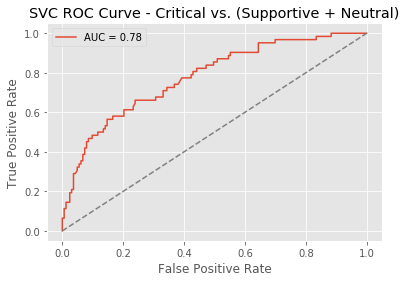

In [239]:
# calculate the ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve - Critical vs. (Supportive + Neutral)')
plt.legend()
plt.show()

In [260]:
# Running the model for tweets supportive of Bolsonaro
y = classis['right support'].to_list()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2000)

In [261]:
result = grid_search.fit(X_train, y_train)
svc_pos = result.best_estimator_

In [262]:
# Training the model with the training data

svc_pos.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc',
                 SVC(C=1, gamma=0.01, kernel='sigmoid', probability=True))])

In [263]:
# Predicting the test data categories
y_pred = svc_pos.predict_proba(X_test)[:,1]

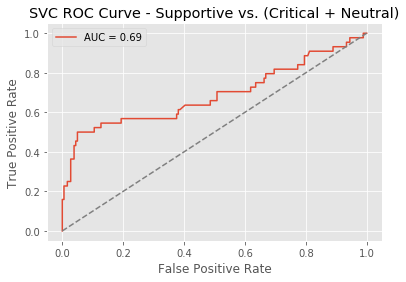

In [264]:
# calculate the ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve - Supportive vs. (Critical + Neutral)')
plt.legend()
plt.show()

In [265]:
# Running the model for neutral tweets
y = classis['neutral'].to_list()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2000)

In [266]:
result = grid_search.fit(X_train, y_train)
svc_neutral = result.best_estimator_

In [267]:
# Training the model with the training data

svc_neutral.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc', SVC(C=0.1, gamma=1, probability=True))])

In [268]:
# Predicting the test data categories
y_pred = svc_neutral.predict_proba(X_test)[:,1]

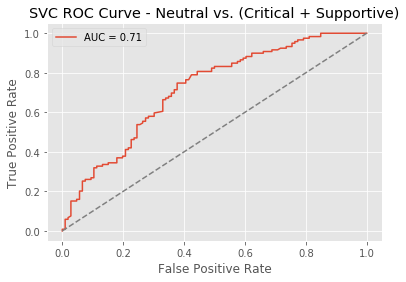

In [269]:
# calculate the ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve - Neutral vs. (Critical + Supportive)')
plt.legend()
plt.show()

## Predicting on our full data

In [310]:
X_final = tweets['processed_tweets'].to_list()
tweet_sentiment_neg = svc_neg.predict_proba(X_final)[:,1]
tweet_sentiment_pos = svc_pos.predict_proba(X_final)[:,1]
tweet_sentiment_neutral = svc_neutral.predict_proba(X_final)[:,1]

KeyboardInterrupt: 

In [ ]:
tweets['likely_neg'] = tweet_sentiment_neg
tweets['likely_pos'] = tweet_sentiment_pos
tweets['likely_neutral'] = tweet_sentiment_neutral

In [272]:
print('The mean likelihood of a tweet being negative of Bolsonaro is ' + str(np.mean(tweets['likely_neg'])) + 
      ', the likelihood of it being supportive of Bolsonaro is ' + str(np.mean(tweets['likely_pos'])) +
      ' and the likelihood of it being neutral towards Bolsonaro is ' + str(np.mean(tweets['likely_neutral'])) + 
     ' across all cities in the period studied.')

The mean likelihood of a tweet being negative of Bolsonaro is 0.22126443153641956, the likelihood of it being supportive of Bolsonaro is 0.14876210353928182 and the likelihood of it being neutral towards Bolsonaro is 0.6390905485345978 across all cities in the period studied.


## Calculating tweet share by city

In [353]:
# Group by city and date, and calculate the mean of the probability of being a tweet opposed to Bolsonaro

tweet_neg = tweets.groupby(['created_at', 'city'])['likely_neg'].mean().reset_index()

In [214]:
tweet_neg_pivot = tweet_neg.pivot(index='created_at', columns='city', values='likely_neg')

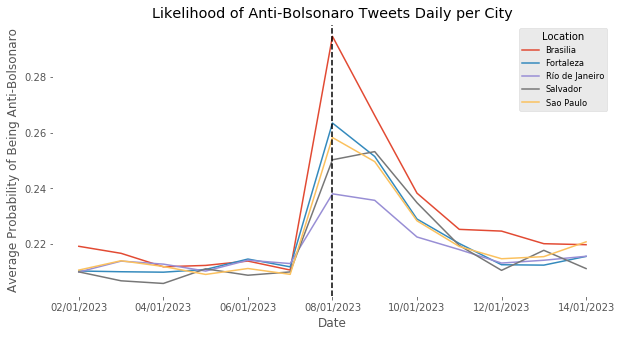

In [215]:
# Plot a line chart of the teacher frequency by city and date
ax = tweet_neg_pivot.plot(figsize=(10, 5))

ax.set_title('Likelihood of Anti-Bolsonaro Tweets Daily per City')
ax.set_xlabel('Date')
ax.set_ylabel('Average Probability of Being Anti-Bolsonaro')
ax.legend(title="Location", loc='best', fontsize='small', fancybox=True, bbox_to_anchor=(1, 1))
ax.set_facecolor('white')
plt.axvline(x = 6, color = 'black', linestyle = "--")

plt.show()

In [216]:
# Group by city and date, and calculate the mean of the probability of being a tweet supportive of Bolsonaro

tweet_pos = tweets.groupby(['created_at', 'city'])['likely_pos'].mean().reset_index()

In [217]:
tweet_pos_pivot = tweet_pos.pivot(index='created_at', columns='city', values='likely_pos')

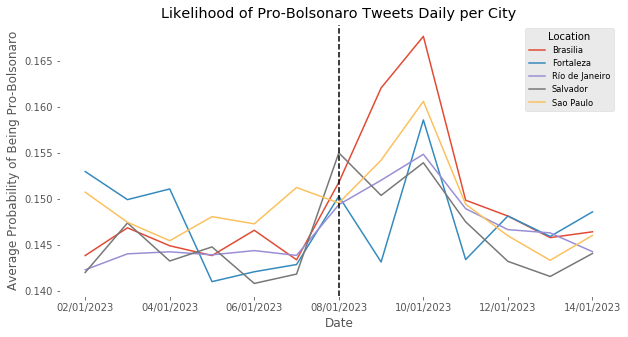

In [218]:
# Plot a line chart of the teacher frequency by city and date
ax = tweet_pos_pivot.plot(figsize=(10, 5))

ax.set_title('Likelihood of Pro-Bolsonaro Tweets Daily per City')
ax.set_xlabel('Date')
ax.set_ylabel('Average Probability of Being Pro-Bolsonaro')
ax.legend(title="Location", loc='best', fontsize='small', fancybox=True, bbox_to_anchor=(1, 1))
ax.set_facecolor('white')
plt.axvline(x = 6, color = 'black', linestyle = "--")

plt.show()

In [219]:
# Group by city and date, and calculate the mean of the probability of being a tweet neutral of Bolsonaro

tweet_neutral = tweets.groupby(['created_at', 'city'])['likely_neutral'].mean().reset_index()

In [220]:
tweet_neutral_pivot = tweet_neutral.pivot(index='created_at', columns='city', values='likely_neutral')

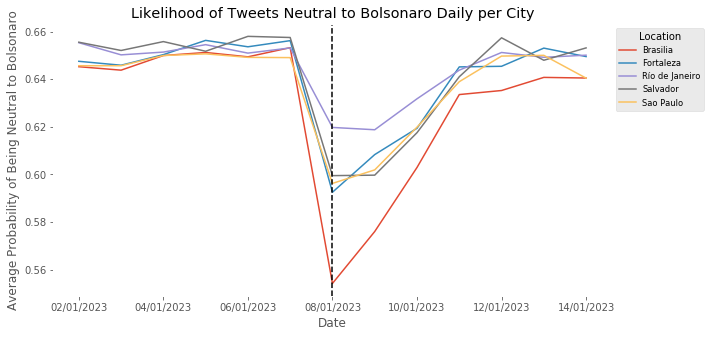

In [221]:
# Plot a line chart of the teacher frequency by city and date
ax = tweet_neutral_pivot.plot(figsize=(10, 5))

ax.set_title('Likelihood of Tweets Neutral to Bolsonaro Daily per City')
ax.set_xlabel('Date')
ax.set_ylabel('Average Probability of Being Neutral to Bolsonaro')
ax.legend(title="Location", loc='best', fontsize='small', fancybox=True, bbox_to_anchor=(1, 1))
ax.set_facecolor('white')
plt.axvline(x = 6, color = 'black', linestyle = "--")

plt.show()

## Difference-in-differences

### DiD on Political Share

In [510]:
did = pd.read_csv('polishare_sdid - polishare_sdid.csv')

In [511]:
new_did = did[(did.date != '2023-01-14') & (did.date != '2023-01-13')]

In [512]:
new_did['treated'] = new_did['treated'].apply(lambda x: 1 if (x==True) else 0)
new_did['treated_time'] = new_did['treated_time'].apply(lambda x: 1 if (x==True) else 0)

/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [513]:
new_did['date'] = pd.to_datetime(new_did['date'], errors = 'coerce')

/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [514]:
effects_df = new_did.set_index(['city_code', 'date'])

In [515]:
y = effects_df['political_share']
effects_df['tt'] = effects_df['treated']*effects_df['treated_time']

In [516]:
effects_df['c'] = 1
dd = ['c', 'treated', 'treated_time', 'tt']

In [517]:
dif_in_dif0 = PanelOLS(y, effects_df[dd]).fit(cov_type = 'clustered', cluster_entity=True)
dif_in_dif1 = PanelOLS(y, effects_df[dd], entity_effects = True, drop_absorbed=True).fit(cov_type = 'clustered', cluster_entity=True)
dif_in_dif2 = PanelOLS(y, effects_df[dd], time_effects = True, drop_absorbed=True).fit(cov_type = 'clustered', cluster_entity=True)
dif_in_dif3 = PanelOLS(y, effects_df[dd], entity_effects = True, time_effects = True, drop_absorbed=True).fit(cov_type = 'clustered', cluster_entity=True)

/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1833: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

treated

  AbsorbingEffectWarning,
/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1833: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

treated_time

  AbsorbingEffectWarning,
/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1833: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

treated, treated_time

  AbsorbingEffectWarning,


In [518]:
dif_in_dif0

Dep. Variable:,political_share,R-squared:,0.4581
Estimator:,PanelOLS,R-squared (Between):,0.8039
No. Observations:,55,R-squared (Within):,0.2985
Date:,"Fri, Mar 03 2023",R-squared (Overall):,0.4581
Time:,17:25:04,Log-likelihood,143.17
Cov. Estimator:,Clustered,,
,,F-statistic:,14.370
Entities:,5,P-value,0.0000
Avg Obs:,11.000,Distribution:,"F(3,51)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,-2.322e+16


In [519]:
dif_in_dif1

LinAlgError: Singular matrix

LinAlgError: Singular matrix

In [520]:
dif_in_dif2

Dep. Variable:,political_share,R-squared:,0.5008
Estimator:,PanelOLS,R-squared (Between):,0.8039
No. Observations:,55,R-squared (Within):,0.0698
Date:,"Fri, Mar 03 2023",R-squared (Overall):,0.3016
Time:,17:25:04,Log-likelihood,163.19
Cov. Estimator:,Clustered,,
,,F-statistic:,21.069
Entities:,5,P-value,0.0000
Avg Obs:,11.000,Distribution:,"F(2,42)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,37.317


In [521]:
dif_in_dif3

Dep. Variable:,political_share,R-squared:,0.0417
Estimator:,PanelOLS,R-squared (Between):,0.2486
No. Observations:,55,R-squared (Within):,0.0698
Date:,"Fri, Mar 03 2023",R-squared (Overall):,0.1263
Time:,17:25:04,Log-likelihood,170.62
Cov. Estimator:,Clustered,,
,,F-statistic:,1.6968
Entities:,5,P-value,0.2003
Avg Obs:,11.000,Distribution:,"F(1,39)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,2.7284


### DiD on Political Bias

In [522]:
tweet_neg = tweets.groupby(['created_at', 'city'])['likely_neg'].mean().reset_index()

In [523]:
tweet_neg['treated'] = tweet_neg['city'].apply(lambda x: 1 if (x=="Brasilia") else 0)
tweet_neg['treated_time'] = tweet_neg['created_at'].apply(lambda x: 1 if (x > "07/01/2023") else 0)

In [524]:
tweet_neg = tweet_neg[(tweet_neg.created_at != '14/01/2023') & (tweet_neg.created_at != '13/01/2023')]

In [525]:
tweet_neg['date'] = pd.to_datetime(tweet_neg['created_at'], errors = 'coerce', format = "%d/%m/%Y")
tweet_neg = tweet_neg.drop('created_at', axis=1)

In [526]:
tweet_neg = tweet_neg.sort_values(['city','date'], ignore_index = True)
tweet_neg = tweet_neg.set_index(['city','date'])

In [527]:
y = tweet_neg['likely_neg']
tweet_neg['const'] = 1.
tweet_neg['tt'] = tweet_neg['treated']*tweet_neg['treated_time']
dd = ['const','treated', 'treated_time', 'tt']

In [528]:
dif_in_dif0 = PanelOLS(y, tweet_neg[dd]).fit()
dif_in_dif1 = PanelOLS(y, tweet_neg[dd], entity_effects = True, drop_absorbed=True).fit(cov_type = 'clustered', cluster_entity=True)
dif_in_dif2 = PanelOLS(y, tweet_neg[dd], time_effects = True, drop_absorbed=True).fit()
dif_in_dif3 = PanelOLS(y, tweet_neg[dd], entity_effects = True, time_effects = True, drop_absorbed=True).fit(cov_type = 'clustered', cluster_entity=True)

/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1833: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

treated

  AbsorbingEffectWarning,
/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1833: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

treated_time

  AbsorbingEffectWarning,
/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1833: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

treated, treated_time

  AbsorbingEffectWarning,


In [529]:
dif_in_dif0

Dep. Variable:,likely_neg,R-squared:,0.5003
Estimator:,PanelOLS,R-squared (Between):,0.8984
No. Observations:,55,R-squared (Within):,0.4789
Date:,"Fri, Mar 03 2023",R-squared (Overall):,0.5003
Time:,17:25:27,Log-likelihood,159.91
Cov. Estimator:,Unadjusted,,
,,F-statistic:,17.024
Entities:,5,P-value,0.0000
Avg Obs:,11.000,Distribution:,"F(3,51)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,17.024


In [530]:
dif_in_dif1

LinAlgError: Singular matrix

LinAlgError: Singular matrix

In [531]:
dif_in_dif2

Dep. Variable:,likely_neg,R-squared:,0.4730
Estimator:,PanelOLS,R-squared (Between):,0.8984
No. Observations:,55,R-squared (Within):,0.1276
Date:,"Fri, Mar 03 2023",R-squared (Overall):,0.1670
Time:,17:25:27,Log-likelihood,210.81
Cov. Estimator:,Unadjusted,,
,,F-statistic:,18.852
Entities:,5,P-value,0.0000
Avg Obs:,11.000,Distribution:,"F(2,42)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,18.852


In [532]:
dif_in_dif3

Dep. Variable:,likely_neg,R-squared:,0.2508
Estimator:,PanelOLS,R-squared (Between):,0.7988
No. Observations:,55,R-squared (Within):,0.1276
Date:,"Fri, Mar 03 2023",R-squared (Overall):,0.1619
Time:,17:25:27,Log-likelihood,212.69
Cov. Estimator:,Clustered,,
,,F-statistic:,13.054
Entities:,5,P-value,0.0009
Avg Obs:,11.000,Distribution:,"F(1,39)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,26.176


In [535]:
tweet_neutral['treated'] = tweet_neutral['city'].apply(lambda x: 1 if (x=="Brasilia") else 0)
tweet_neutral['treated_time'] = tweet_neutral['created_at'].apply(lambda x: 1 if (x > "07/01/2023") else 0)

In [537]:
tweet_neutral = tweet_neutral[(tweet_neutral.created_at != '14/01/2023') & (tweet_neutral.created_at != '13/01/2023')]

In [538]:
tweet_neutral['date'] = pd.to_datetime(tweet_neutral['created_at'], errors = 'coerce', format = "%d/%m/%Y")
tweet_neutral = tweet_neutral.drop('created_at', axis=1)

/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [539]:
tweet_neutral = tweet_neutral.sort_values(['city','date'], ignore_index = True)
tweet_neutral = tweet_neutral.set_index(['city','date'])

In [540]:
y = tweet_neutral['likely_neutral']
tweet_neutral['const'] = 1.
tweet_neutral['tt'] = tweet_neutral['treated']*tweet_neutral['treated_time']
dd = ['const','treated', 'treated_time', 'tt']

In [542]:
dif_in_dif0 = PanelOLS(y, tweet_neg[dd]).fit()
dif_in_dif1 = PanelOLS(y, tweet_neg[dd], entity_effects = True, drop_absorbed=True).fit(cov_type = 'clustered', cluster_entity=True)
dif_in_dif2 = PanelOLS(y, tweet_neg[dd], time_effects = True, drop_absorbed=True).fit()
dif_in_dif3 = PanelOLS(y, tweet_neg[dd], entity_effects = True, time_effects = True, drop_absorbed=True).fit(cov_type = 'clustered', cluster_entity=True)

/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1833: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

treated

  AbsorbingEffectWarning,
/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1833: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

treated_time

  AbsorbingEffectWarning,
/Users/giovannachaves/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1833: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

treated, treated_time

  AbsorbingEffectWarning,


In [543]:
dif_in_dif0

Dep. Variable:,likely_neutral,R-squared:,0.5373
Estimator:,PanelOLS,R-squared (Between):,0.8044
No. Observations:,55,R-squared (Within):,0.5199
Date:,"Fri, Mar 03 2023",R-squared (Overall):,0.5373
Time:,17:33:36,Log-likelihood,150.33
Cov. Estimator:,Unadjusted,,
,,F-statistic:,19.743
Entities:,5,P-value,0.0000
Avg Obs:,11.000,Distribution:,"F(3,51)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,19.743


In [544]:
dif_in_dif1

LinAlgError: Singular matrix

LinAlgError: Singular matrix

In [545]:
dif_in_dif2

Dep. Variable:,likely_neutral,R-squared:,0.5639
Estimator:,PanelOLS,R-squared (Between):,0.8044
No. Observations:,55,R-squared (Within):,0.1593
Date:,"Fri, Mar 03 2023",R-squared (Overall):,0.1989
Time:,17:33:36,Log-likelihood,204.57
Cov. Estimator:,Unadjusted,,
,,F-statistic:,27.151
Entities:,5,P-value,0.0000
Avg Obs:,11.000,Distribution:,"F(2,42)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,27.151


In [546]:
dif_in_dif3

Dep. Variable:,likely_neutral,R-squared:,0.3931
Estimator:,PanelOLS,R-squared (Between):,0.7571
No. Observations:,55,R-squared (Within):,0.1593
Date:,"Fri, Mar 03 2023",R-squared (Overall):,0.1960
Time:,17:33:36,Log-likelihood,210.24
Cov. Estimator:,Clustered,,
,,F-statistic:,25.264
Entities:,5,P-value,0.0000
Avg Obs:,11.000,Distribution:,"F(1,39)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,59.222
